In [27]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes to the graph
G.add_node("København")
G.add_node("Odense")
G.add_node("Aarhus")

# Add edges to the graph
G.add_edge("København", "Odense", cost = 5, owned_by = None, color = "red")
G.add_edge("Aarhus", "Odense", cost = 10, owned_by = "red", color = "blue")
G.add_edge("Aarhus", "København", cost = 15, owned_by = "blue", color = "green")

def render_board(graph):

    G = graph.copy()
    
    pos = nx.spring_layout(G, seed=42)
    # Get edge colors from 'owned_by' attribute. If None, then assign a default color (e.g., "black").
    colors = [edata['owned_by'] if edata['owned_by'] is not None else edata["color"] for _, _, edata in G.edges(data=True)]
    # Specify line widths
    widths = [4 if edata['owned_by'] is not None else 1 for _, _, edata in G.edges(data=True)]

    # Get edge costs if 'owned_by' attribute is None
    edge_costs = {(u, v): edata['cost'] for u, v, edata in G.edges(data=True) if edata['owned_by'] is None}

    styles = ['dashed' if edata['owned_by'] is None else 'solid' for _, _, edata in G.edges(data=True)]
    # Draw the graph
    nx.draw(G, pos, node_color="white", edge_color=colors, width=widths, with_labels=True, style = styles)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_costs)

    plt.show()


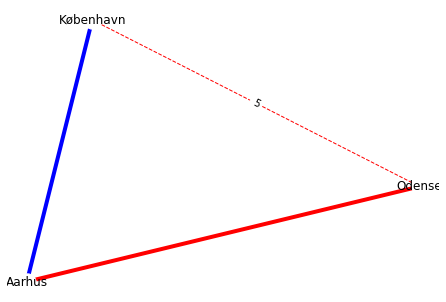

In [29]:
render_board(G)